In [8]:
##Cyberbullying Detection (Text Classification)

#🧭 **Problem Statement:** You are provided with **twitter_parsed_tweets**: you have to perform a step-by-step NLP approach to identify the toxicity of the tweet, and classify the tweet in a binary value. 

#The target variable is **oh-label** and the evaluation metric is **F1-score**.


In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


import re
import string

In [7]:
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('twitter_parsed_dataset.csv')

In [9]:
df.head()

,index,id,Text,Annotation,oh_label
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,5.75596338802373E+017,5.75596338802373E+017,#mkr No No No No No No,none,0.0


In [10]:
df.columns

Index(['index', 'id', 'Text', 'Annotation', 'oh_label'], dtype='object')

In [11]:
print('length of data is', len(df))

length of data is 16851


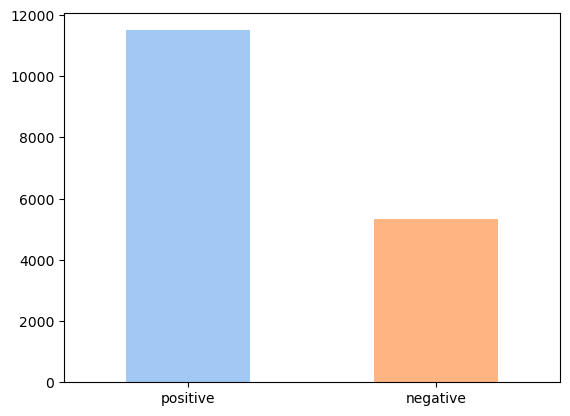

In [13]:
df['oh_label'].value_counts().plot(kind='bar', color=sns.color_palette('pastel'))
plt.xticks([0,1],['positive', 'negative'], rotation=0);

In [14]:
df.isna().sum()

index         0
id            1
Text          1
Annotation    3
oh_label      3
dtype: int64

In [15]:
df.shape

(16851, 5)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16851 entries, 0 to 16850
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       16851 non-null  object 
 1   id          16850 non-null  object 
 2   Text        16850 non-null  object 
 3   Annotation  16848 non-null  object 
 4   oh_label    16848 non-null  float64
dtypes: float64(1), object(4)
memory usage: 658.4+ KB


In [17]:
df.dtypes

index          object
id             object
Text           object
Annotation     object
oh_label      float64
dtype: object

In [18]:
np.sum(df.isnull().any(axis=1))

3

In [21]:
df=df.dropna()

In [22]:
df.isna().sum()

index         0
id            0
Text          0
Annotation    0
oh_label      0
dtype: int64

In [25]:
df['oh_label'].unique()

array([0., 1.])

In [26]:
df['oh_label']=df['oh_label'].astype(int)

In [27]:
df.rename(columns = {'oh_label':'target'}, inplace = True)

In [28]:
df

,index,id,Text,Annotation,target
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1
4,5.75596338802373E+017,5.75596338802373E+017,#mkr No No No No No No,none,0
...,...,...,...,...,...
16846,5.75606766236475E+017,5.75606766236475E+017,"Feeling so sorry for the girls, they should be...",none,0
16847,5.72333822886326E+017,5.72333822886326E+017,#MKR 'pretty good dishes we're happy with' - O...,none,0
16848,5.72326950057845E+017,5.72326950057845E+017,RT @colonelkickhead: Deconstructed lemon tart!...,none,0
16849,5.74799612642357E+017,5.74799612642357E+017,@versacezaynx @nyazpolitics @greenlinerzjm You...,none,0


In [29]:
df.drop(['index'], axis=1)

,id,Text,Annotation,target
0,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0
1,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0
2,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1
3,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1
4,5.75596338802373E+017,#mkr No No No No No No,none,0
...,...,...,...,...
16846,5.75606766236475E+017,"Feeling so sorry for the girls, they should be...",none,0
16847,5.72333822886326E+017,#MKR 'pretty good dishes we're happy with' - O...,none,0
16848,5.72326950057845E+017,RT @colonelkickhead: Deconstructed lemon tart!...,none,0
16849,5.74799612642357E+017,@versacezaynx @nyazpolitics @greenlinerzjm You...,none,0


In [30]:
df.columns= df.columns.str.lower()

In [31]:
df.columns

Index(['index', 'id', 'text', 'annotation', 'target'], dtype='object')

In [32]:
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

<Axes: xlabel='target', ylabel='count'>

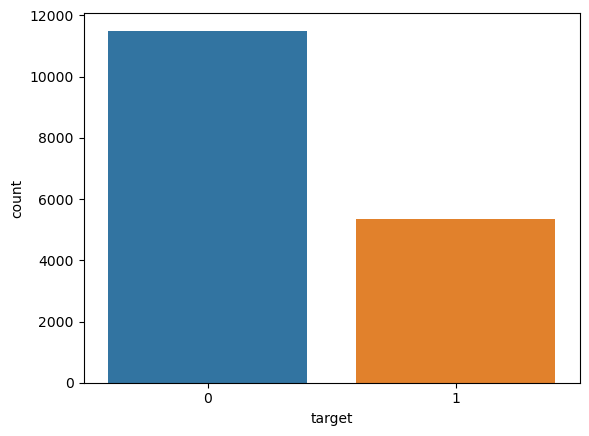

In [33]:
sns.countplot(x='target', data=df)

In [34]:
data=df[['text','target']]

In [35]:
data['target'].unique()

array([0, 1])

In [36]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [37]:
data_pos = data_pos.iloc[:int(4000)]
data_neg = data_neg.iloc[:int(4000)]

In [38]:
dataset = pd.concat([data_pos, data_neg])

In [39]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

5805     this is the best account. http://t.co/fio7cnlvnj
5806     which will end first: #mkr or tony abbott as pm?
5807    rt @kirrily: is kat crazy? like the joker. cru...
5808    @kristinaa_egger i hope eva and debra win the ...
5809    "we're not going to be de-boning this spatchco...
Name: text, dtype: object

In [40]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [41]:
##Cleaning and removing the above stop words list from the tweet text
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

2     rt @mooseoftorment call sexist, but go auto pl...
3     @g0ssipsquirrelx wrong, isis follows example m...
6     rt @millhouse66 @maureen_js nooo not sexist bu...
9     rt @newmanzaa: there's something wrong girl wi...
11    @sirajzarook @odiniainvictus @bilalighumman @i...
Name: text, dtype: object

In [42]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

5805                       best account httptcofio7cnlvnj
5806                         end first mkr tony abbott pm
5807    rt kirrily kat crazy like joker cruel amp craz...
5808    kristinaaegger hope eva debra win competition mkr
5809    were not going deboning spatchcock teams may e...
Name: text, dtype: object

In [43]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

5805                       best account httptcofio7cnlvnj
5806                         end first mkr tony abbott pm
5807    rt kirrily kat crazy like joker cruel amp craz...
5808    kristinaaegger hope eva debra win competition mkr
5809    were not going deboning spatchcock teams may e...
Name: text, dtype: object

In [44]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

5805                       best account httptcofio7cnlvnj
5806                         end first mkr tony abbott pm
5807    rt kirrily kat crazy like joker cruel amp craz...
5808    kristinaaegger hope eva debra win competition mkr
5809    were not going deboning spatchcock teams may e...
Name: text, dtype: object

In [45]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

5805                        best account httptcofiocnlvnj
5806                         end first mkr tony abbott pm
5807    rt kirrily kat crazy like joker cruel amp craz...
5808    kristinaaegger hope eva debra win competition mkr
5809    were not going deboning spatchcock teams may e...
Name: text, dtype: object

In [46]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

2               []
3           [w, w]
6              [w]
9     [w, w, w, w]
11              []
Name: text, dtype: object

In [47]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

2               []
3           [w, w]
6              [w]
9     [w, w, w, w]
11              []
Name: text, dtype: object

In [52]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

2               []
3           [w, w]
6              [w]
9     [w, w, w, w]
11              []
Name: text, dtype: object

In [49]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mayuri\AppData\Roaming\nltk_data...


True

In [51]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Mayuri\AppData\Roaming\nltk_data...


True

In [53]:
X=data.text
y=data.target

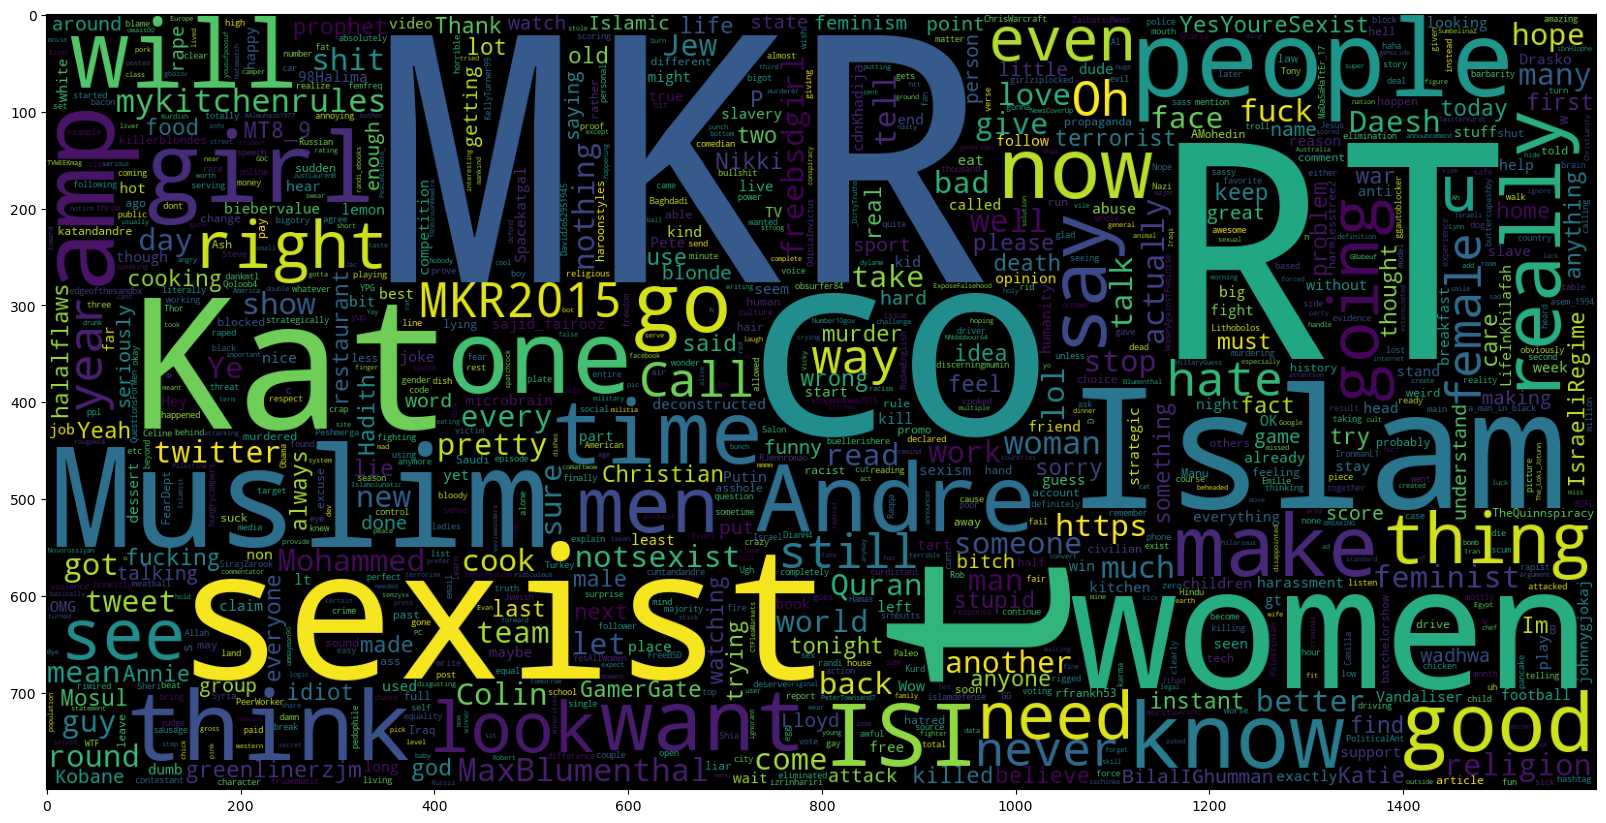

In [54]:
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

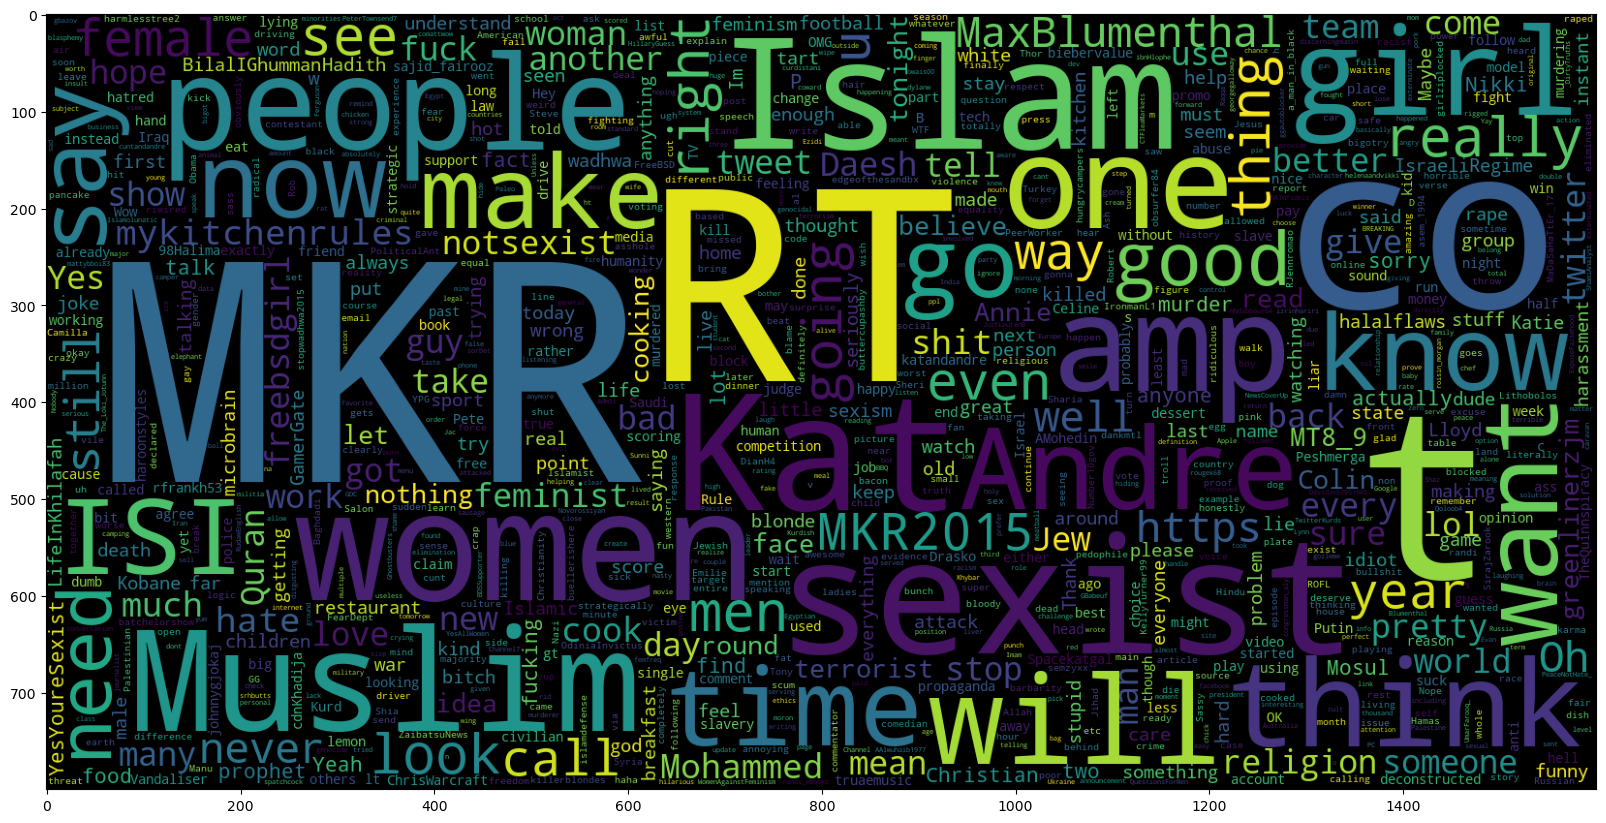

In [56]:
data_pos = data['text'][8000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [57]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [66]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500, ngram_range=(1, 2))

In [67]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [71]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       587
           1       0.70      0.57      0.62       256

    accuracy                           0.79       843
   macro avg       0.76      0.73      0.74       843
weighted avg       0.79      0.79      0.79       843



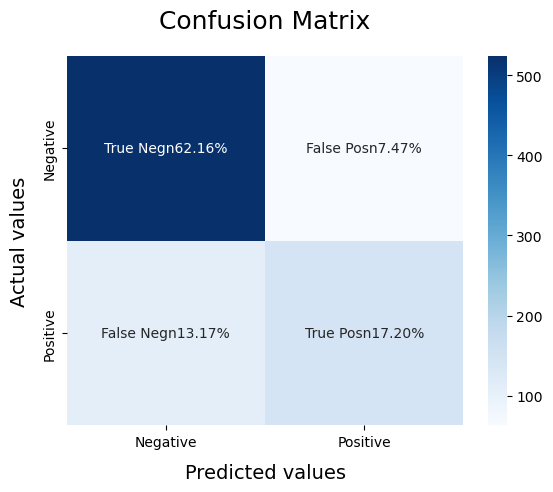

In [72]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       587
           1       0.74      0.56      0.64       256

    accuracy                           0.81       843
   macro avg       0.78      0.74      0.75       843
weighted avg       0.80      0.81      0.80       843



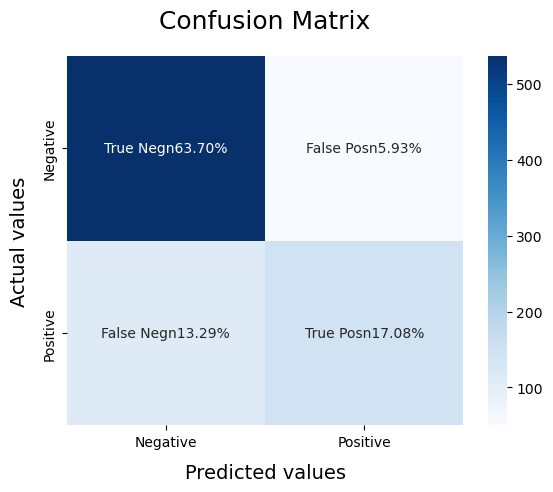

In [73]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       587
           1       0.72      0.56      0.63       256

    accuracy                           0.80       843
   macro avg       0.77      0.73      0.75       843
weighted avg       0.79      0.80      0.79       843



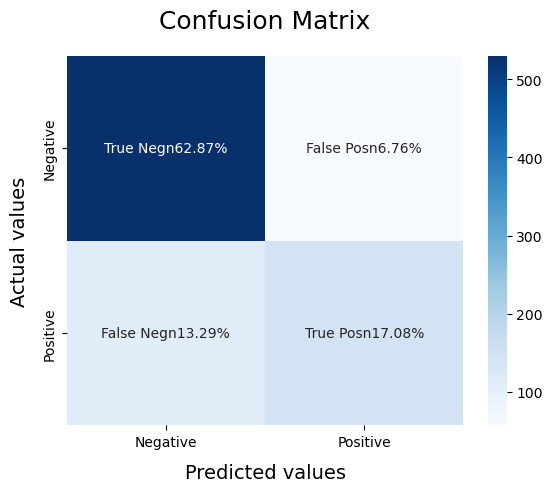

In [74]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

In [ ]:
#F1-score: The F1 Scores for class 0 and class 1 are :
#(a) For class 0: Bernoulli Naive Bayes(accuracy = 0.86) < SVM (accuracy =0.87) > Logistic Regression (accuracy = 0.86)
#(b) For class 1: Bernoulli Naive Bayes (accuracy = 0.62) < SVM (accuracy = 0.64) > Logistic Regression (accuracy = 0.63)